<a href="https://colab.research.google.com/github/curtiscu/LYIT/blob/master/MIDI_Tests_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIDI Tests

Using this colab to test loading MIDI files and examining/ exploring their contents.

## APIs

APIs I'll be testing ..

* MIDO - https://mido.readthedocs.io/en/latest/
* Music21 (MIT) - http://web.mit.edu/music21/doc/

## Data/ Files

Using this data...
* https://magenta.tensorflow.org/datasets/groove#download

Folders with files that look useful...

* /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session
* /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer5/eval_session
* /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer7/eval_session
* /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer8/eval_session



# Env setup

Handy doc on setting up your notebook ...
* https://ipython.readthedocs.io/en/stable/config/options/terminal.html
* https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

In [0]:
# print all cell output

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session
! ls -al '/content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session/'

total 35
-rw------- 1 root root 2589 Apr 27 12:01 10_soul-groove10_102_beat_4-4.mid
-rw------- 1 root root 4793 Apr 27 12:01 1_funk-groove1_138_beat_4-4.mid
-rw------- 1 root root 3243 Apr 27 12:01 2_funk-groove2_105_beat_4-4.mid
-rw------- 1 root root 4466 Apr 27 12:01 3_soul-groove3_86_beat_4-4.mid
-rw------- 1 root root 2551 Apr 27 12:01 4_soul-groove4_80_beat_4-4.mid
-rw------- 1 root root 3798 Apr 27 12:01 5_funk-groove5_84_beat_4-4.mid
-rw------- 1 root root 3760 Apr 27 12:01 6_hiphop-groove6_87_beat_4-4.mid
-rw------- 1 root root 1894 Apr 27 12:01 7_pop-groove7_138_beat_4-4.mid
-rw------- 1 root root 2437 Apr 27 12:01 8_rock-groove8_65_beat_4-4.mid
-rw------- 1 root root 3448 Apr 27 12:01 9_soul-groove9_105_beat_4-4.mid


# MIDO

In [4]:
!pip install mido


     |████████████████████████████████| 61kB 4.6MB/s 


In [0]:
# install a backend for playing MIDI files etc.
#pip install python-rtmidi

# testing playing files with the following, doesn't work in colab :(

# ! mido-play $file_1


In [0]:
import mido

In [6]:
# testing some basic APIs..

msg = mido.Message('note_on', note=60)
print('Type: {}'.format(msg.type))
print('Note: {}'.format(msg.note))
print('Bytes: {}'.format(msg.bytes()))
print('Copied note info: {}'.format(msg.copy(channel=2)))



Type: note_on
Note: 60
Bytes: [144, 60, 64]
Copied note info: note_on channel=2 note=60 velocity=64 time=0


In [0]:
# file handling...

from mido import MidiFile

file_1 = '/content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session/1_funk-groove1_138_beat_4-4.mid'
mid = MidiFile(file_1)


There are three types of MIDI files:

* type 0 (single track): all messages are saved in one track
* type 1 (synchronous): all tracks start at the same time
* type 2 (asynchronous): each track is independent of the others

In [37]:
mid.type

0

In [38]:
# total playback time in seconds given by .length property...
mid.length

27.872307693749978

In [9]:
mid.ticks_per_beat

480

In [39]:

# show all MIDI messages in file..

# note: the assumption here is we're dealing with a drum/ percussion
# track, therefore only care about 'note_on' events...
for i, track in enumerate(mid.tracks):
    print('Track {}: {}'.format(i, track.name))
    for msg in track:
      if msg.dict()['type'] == 'note_on':
        print(msg)

Track 0: MIDI
note_on channel=9 note=55 velocity=60 time=3
note_on channel=9 note=51 velocity=55 time=4
note_on channel=9 note=36 velocity=64 time=3
note_on channel=9 note=36 velocity=57 time=22
note_on channel=9 note=51 velocity=31 time=17
note_on channel=9 note=44 velocity=77 time=1
note_on channel=9 note=51 velocity=54 time=21
note_on channel=9 note=38 velocity=93 time=8
note_on channel=9 note=44 velocity=52 time=0
note_on channel=9 note=51 velocity=42 time=2
note_on channel=9 note=38 velocity=33 time=12
note_on channel=9 note=44 velocity=77 time=0
note_on channel=9 note=51 velocity=46 time=1
note_on channel=9 note=44 velocity=0 time=27
note_on channel=9 note=51 velocity=0 time=0
note_on channel=9 note=38 velocity=33 time=95
note_on channel=9 note=44 velocity=47 time=0
note_on channel=9 note=36 velocity=59 time=32
note_on channel=9 note=51 velocity=42 time=1
note_on channel=9 note=44 velocity=77 time=1
note_on channel=9 note=51 velocity=64 time=32
note_on channel=9 note=40 velocity=

In [35]:
mid.print_tracks()

=== Track 0
<meta message track_name name='MIDI' time=0>
<meta message instrument_name name='Brooklyn' time=0>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
<meta message key_signature key='C' time=0>
<meta message smpte_offset frame_rate=24 hours=33 minutes=0 seconds=0 frames=0 sub_frames=0 time=0>
<meta message set_tempo tempo=434783 time=0>
<message note_on channel=9 note=55 velocity=60 time=3>
<message note_on channel=9 note=51 velocity=55 time=4>
<message note_on channel=9 note=36 velocity=64 time=3>
<message control_change channel=9 control=4 value=90 time=3>
<message note_off channel=9 note=55 velocity=64 time=102>
<message note_off channel=9 note=51 velocity=64 time=3>
<message note_off channel=9 note=36 velocity=64 time=2>
<message control_change channel=9 control=4 value=87 time=69>
<message note_on channel=9 note=36 velocity=57 time=22>
<message control_change channel=9 control=4 value=90 time=10>
<message no

In [36]:
mido.parse_all(mid)

TypeError: ignored

# Music21



In [11]:
!pip install music21

In [0]:
import music21
from music21 import *

In [0]:
# music21.configure.run()

In [14]:
# testing API...
c = chord.Chord("C4 E4 G4")
c.isConsonant()

True

In [15]:
# .. more testing API...
n = note.Note("D#3")
n.duration.type = 'half'
n.show('midi')
n.show('text')

<music21.note.Note D#>


## File handling


In [0]:
# specify file...
m21_file_1 = '/content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session/2_funk-groove2_105_beat_4-4.mid'

# load file...
midi_file_1 = converter.parse(m21_file_1)




The previous code loads a 'music21.stream.Stream' object ...

* https://web.mit.edu/music21/doc/moduleReference/moduleStream.html

In [17]:
partStream = midi_file_1.parts.stream()
print("List of instruments found on MIDI file:")
for p in partStream:
  print (p.partName)



List of instruments found on MIDI file:
None


In [18]:
timeSignature = midi_file_1.getTimeSignatures()[0]
print("Music time signature: {0}/{1}".format(timeSignature.beatCount, timeSignature.denominator))

Music time signature: 4/4


In [19]:
midi_file_1.duration

<music21.duration.Duration 63.75>

In [20]:
midi_file_1.parts.stream().classes

('Score', 'Stream', 'StreamCoreMixin', 'Music21Object', 'object')

## Show events


In [21]:
# text display of notes...
midi_file_1.show('text')

{0.0} <music21.stream.Part 0x7f74d4b17eb8>
    {0.0} <music21.tempo.MetronomeMark Quarter=105.0>
    {0.0} <music21.key.Key of C major>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.stream.Voice 0x7f74d4bfd048>
        {0.0} <music21.chord.Chord C2 B-0>
        {0.5} <music21.note.Note F#>
        {0.75} <music21.note.Note C>
        {1.0} <music21.chord.Chord B-0 E2>
        {1.5} <music21.note.Note F#>
        {1.75} <music21.note.Note C>
        {2.0} <music21.note.Note F#>
        {2.25} <music21.note.Note C>
        {2.5} <music21.note.Note D>
        {3.0} <music21.chord.Chord G#2 E2 B-0>
        {3.0} <music21.note.Note D>
        {3.5} <music21.chord.Chord D2 B-0>
        {3.75} <music21.note.Note D>
        {4.0} <music21.note.Note D>
        {5.0} <music21.chord.Chord E2 B-0>
        {5.5} <music21.note.Note B->
        {5.75} <music21.note.Note C>
        {6.0} <music21.note.Note F#>
        {6.25} <music21.note.Note C>
        {6.5} <music21.note.Note D>
  

In [22]:
# .. as above, filtered to first 4 bars...
midi_file_1.measures(0, 4).show("text")

{0.0} <music21.stream.Part 0x7f74d4bd3208>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.clef.BassClef>
        {0.0} <music21.meter.TimeSignature 4/4>
        {0.0} <music21.stream.Voice 0>
            {0.0} <music21.chord.Chord C2 B-0>
            {0.5} <music21.note.Note F#>
            {0.75} <music21.note.Note C>
            {1.0} <music21.chord.Chord B-0 E2>
            {1.5} <music21.note.Note F#>
            {1.75} <music21.note.Note C>
            {2.0} <music21.note.Note F#>
            {2.25} <music21.note.Note C>
            {2.5} <music21.note.Note D>
            {3.0} <music21.chord.Chord G#2 E2 B-0>
            {3.0} <music21.note.Note D>
            {3.5} <music21.chord.Chord D2 B-0>
            {3.75} <music21.note.Note D>
        {0.0} <music21.stream.Voice 1>
            {0.0} <music21.note.Rest rest>
        {0.0} <music21.stream.Voice 2>

    {4.0} <music21.stream.Measure 2 offset=4.0>
        {0.0} <music21.stream.Voice 0>
            {0.0

## Graphical out (piano roll, histo, etc.)

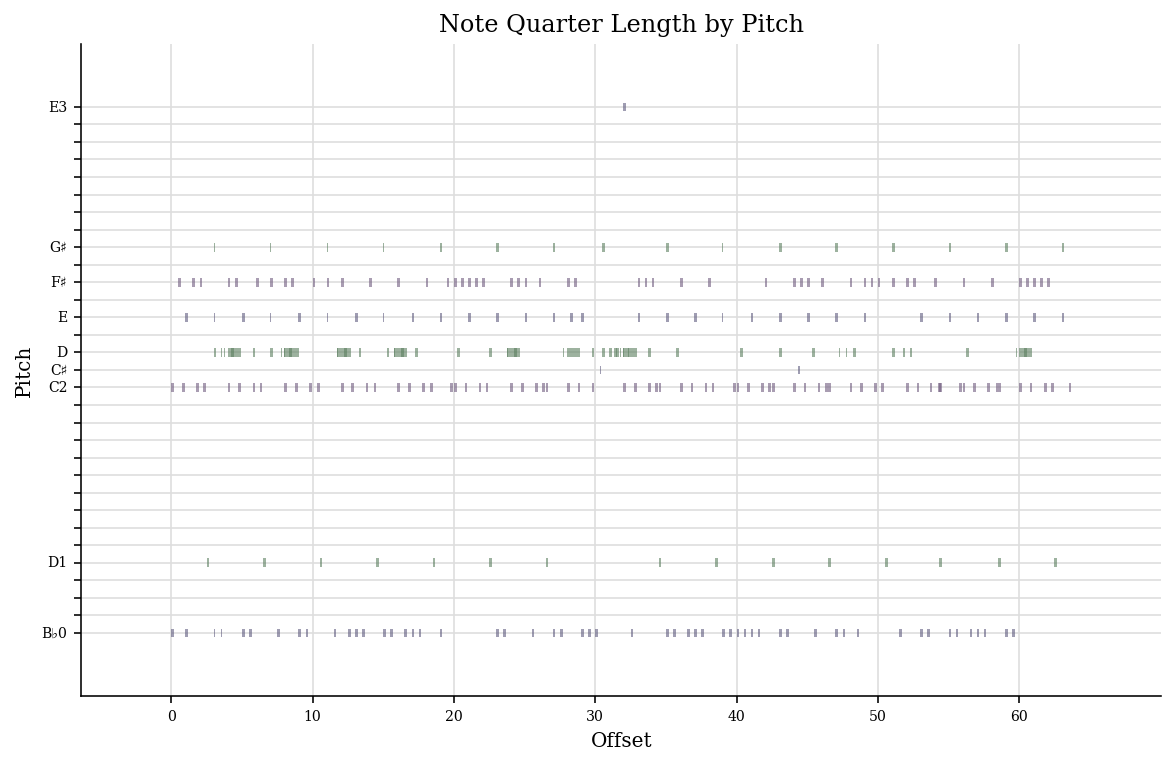

In [23]:
 midi_file_1.plot('pianoroll')

In [24]:
midi_file_2_stream.plot('pitchclass')

NameError: ignored

## more music21 file stuff

In [0]:
# specify same file as used in MIDO trial above, for comparison, load file...
midi_file_2_stream = converter.parse(file_1)


In [26]:
# text display of notes...
midi_file_2_stream.show('text')

{0.0} <music21.stream.Part 0x7f74d19608d0>
    {0.0} <music21.tempo.MetronomeMark allegrissimo Quarter=138.0>
    {0.0} <music21.key.Key of C major>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.stream.Voice 0x7f74d19fa128>
        {0.0} <music21.chord.Chord G3 E-3 C2>
        {0.5} <music21.chord.Chord C2 E-3>
        {1.0} <music21.chord.Chord G#2 E-3 D2>
        {1.3333} <music21.note.Note G#>
        {1.75} <music21.note.Note D>
        {2.0} <music21.note.Note G#>
        {2.25} <music21.note.Note D>
        {2.5} <music21.chord.Chord C2 E-3>
        {3.0} <music21.note.Note G#>
        {3.3333} <music21.note.Note G#>
        {3.75} <music21.note.Note D>
        {4.0} <music21.note.Note G#>
        {4.3333} <music21.note.Note G#>
        {5.0} <music21.chord.Chord G#2 D2 E-3>
        {5.5} <music21.note.Note G#>
        {5.75} <music21.note.Note D>
        {6.0} <music21.chord.Chord G#2 E-3>
        {6.25} <music21.note.Note D>
        {6.5} <music21.note.Note E->

In [27]:
midi_file_2_stream
print('')
midi_file_2_stream.parts[0].elements

<music21.stream.Score 0x7f74d19575f8>

(<music21.tempo.MetronomeMark allegrissimo Quarter=138.0>,
 <music21.key.Key of C major>,
 <music21.meter.TimeSignature 4/4>,
 <music21.stream.Voice 0x7f74d19fa128>,
 <music21.stream.Voice 0x7f74d172b470>,
 <music21.stream.Voice 0x7f74d169cc18>,
 <music21.stream.Voice 0x7f74d16b3ac8>)

In [28]:
midi_file_2_stream.parts[0].elements[5]
print('')
midi_file_2_stream.parts[0].elements[5].elements

<music21.stream.Voice 0x7f74d169cc18>

(<music21.note.Rest rest>,
 <music21.note.Note D>,
 <music21.note.Rest rest>,
 <music21.note.Note E->,
 <music21.note.Note D>,
 <music21.note.Note E->,
 <music21.note.Note E->,
 <music21.note.Note D>,
 <music21.note.Note E->,
 <music21.chord.Chord E-3 C2>,
 <music21.note.Note D>,
 <music21.chord.Chord G#2 C2 E-3>,
 <music21.note.Note G#>,
 <music21.note.Note D>,
 <music21.note.Rest rest>)

In [29]:
for el in midi_file_2_stream.parts[0].elements[5].getElementsByClass('Rest'):
    print(el, el.offset)

<music21.note.Rest rest> 0.0
<music21.note.Rest rest> 8.0
<music21.note.Rest rest> 599/12


In [30]:
midi_file_2_stream.iter
print('')
next(midi_file_2_stream.iter)


<music21.stream.iterator.StreamIterator for Score:0x7f74d19575f8 @:0>

<music21.stream.Part 0x7f74d19608d0>

In [31]:
# this pulls all the notes out...
myRecIter = midi_file_2_stream.recurse()
myRecIter.notes.elements


(<music21.chord.Chord G3 E-3 C2>,
 <music21.chord.Chord C2 E-3>,
 <music21.chord.Chord G#2 E-3 D2>,
 <music21.note.Note G#>,
 <music21.note.Note E->,
 <music21.note.Note D>,
 <music21.note.Note G#>,
 <music21.note.Note E->,
 <music21.note.Note D>,
 <music21.note.Note G#>,
 <music21.chord.Chord C2 E-3>,
 <music21.note.Note G#>,
 <music21.chord.Chord E-3 E2>,
 <music21.note.Note G#>,
 <music21.note.Note E->,
 <music21.note.Note D>,
 <music21.note.Note G#>,
 <music21.chord.Chord E-3 C2>,
 <music21.note.Note G#>,
 <music21.chord.Chord C2 E-3>,
 <music21.chord.Chord G#2 D2 E-3>,
 <music21.note.Note G#>,
 <music21.note.Note E->,
 <music21.note.Note D>,
 <music21.chord.Chord G#2 E-3>,
 <music21.note.Note D>,
 <music21.chord.Chord C2 G#2>,
 <music21.note.Note E->,
 <music21.note.Note C>,
 <music21.chord.Chord D2 G#2 E-3>,
 <music21.note.Note G#>,
 <music21.note.Note E->,
 <music21.note.Note D>,
 <music21.note.Note D>,
 <music21.chord.Chord G#2 C2 E-3>,
 <music21.note.Note D>,
 <music21.chord.C

In [33]:

pm = midi.percussion.PercussionMapper()
for note in myRecIter.notes.elements:
  try:
    print('note {}  is :{}; duration: {}'.format(note.pitch, pm.midiPitchToInstrument(note.pitch), note.duration))
  except AttributeError:
    print('no pitch in: {}'.format(note))
  except music21.midi.percussion.MIDIPercussionException:
    print('INVALID MIDI PERC NUMBER!!!! : {}'.format(note))

  

no pitch in: <music21.chord.Chord G3 E-3 C2>
no pitch in: <music21.chord.Chord C2 E-3>
no pitch in: <music21.chord.Chord G#2 E-3 D2>
note G#2  is :Hi-Hat Cymbal; duration: <music21.duration.Duration 0.25>
INVALID MIDI PERC NUMBER!!!! : <music21.note.Note E->
note D2  is :Snare Drum; duration: <music21.duration.Duration 0.25>
note G#2  is :Hi-Hat Cymbal; duration: <music21.duration.Duration 0.25>
INVALID MIDI PERC NUMBER!!!! : <music21.note.Note E->
note D2  is :Snare Drum; duration: <music21.duration.Duration 0.25>
note G#2  is :Hi-Hat Cymbal; duration: <music21.duration.Duration 0.25>
no pitch in: <music21.chord.Chord C2 E-3>
note G#2  is :Hi-Hat Cymbal; duration: <music21.duration.Duration 0.25>
no pitch in: <music21.chord.Chord E-3 E2>
note G#2  is :Hi-Hat Cymbal; duration: <music21.duration.Duration 0.25>
INVALID MIDI PERC NUMBER!!!! : <music21.note.Note E->
note D2  is :Snare Drum; duration: <music21.duration.Duration 0.25>
note G#2  is :Hi-Hat Cymbal; duration: <music21.duration.

## music21 API

In [34]:
note

<music21.note.Note G#>

In [0]:
# this will show verbose help inline, or you
# could instead go here: https://web.mit.edu/music21/doc/moduleReference/moduleNote.html#music21.note.Note

# >>> help(note.Note)